# SMS Spam filtering

## Loading Data

In [1]:
import pandas as pd
data= pd.read_csv("spam.csv",encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text_mssg"})
print(data)


     label                                          text_mssg
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [2]:
data.groupby("label").describe()

text_mssg                                                               
          count unique                                                top freq
label                                                                         
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [3]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Ploting Data

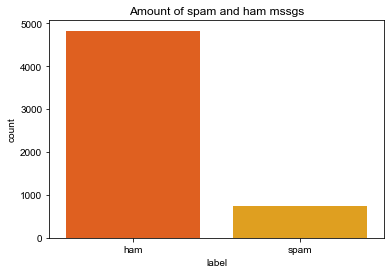

In [4]:
import seaborn as sb
sb.countplot(data=data,x='label',palette="autumn").set_title("Amount of spam and ham mssgs")
sb.set_style(style="darkgrid")


## Adding numerical label to spam

In [5]:
data['spam/ham'] = data['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head()

,label,text_mssg,spam/ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Word Cloud

pip install wordcloud

# Preprocessing

## Removing punctuations and Stopwords

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [8]:
def punc_and_stopwords_remove(sms):
   no_punc="".join([c for c in sms if c not in string.punctuation ]).split()
   sms_no_punc_no_stopwords = [word.lower() for word in no_punc if word.lower() not in stopwords.words("english")]
   return sms_no_punc_no_stopwords

data['text_mssg'].apply(punc_and_stopwords_remove).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text_mssg, dtype: object

In [9]:
data.head()

,label,text_mssg,spam/ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Word Cloud

pip install wordcloud

In [10]:
data_ham  = data[data['spam/ham'] == 0].copy()
data_spam = data[data['spam/ham'] == 1].copy()

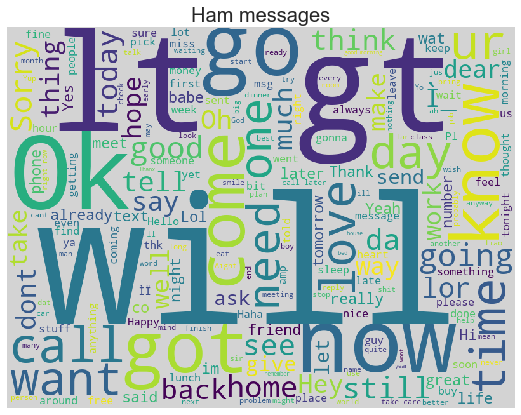

In [11]:
import wordcloud
import matplotlib.pyplot as plt

def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text_mssg'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()
show_wordcloud(data_ham, "Ham messages")

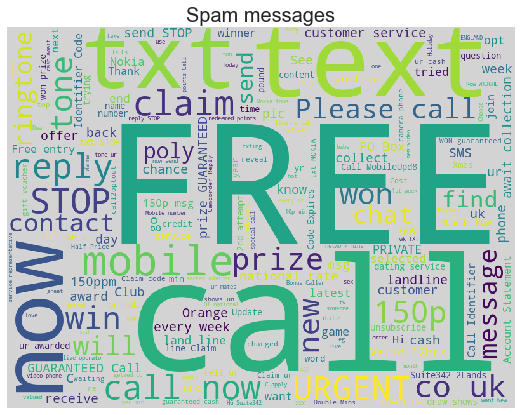

In [12]:
show_wordcloud(data_spam, "Spam messages")

## Bag of Words using CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = punc_and_stopwords_remove).fit(data['text_mssg'])

In [14]:
print(len(bow_transformer.vocabulary_))

9431


## Some vectorization examples of spam and ham messages

### Spam

In [15]:
sample_spam = data['text_mssg'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
  (0, 218)	1
  (0, 323)	1
  (0, 1906)	1
  (0, 2184)	2
  (0, 2245)	1
  (0, 2531)	1
  (0, 4194)	1
  (0, 4759)	1
  (0, 5707)	1
  (0, 6538)	1
  (0, 6775)	1
  (0, 6946)	1
  (0, 7209)	1
  (0, 8694)	1
  (0, 8698)	1
  (0, 9028)	1
  (0, 9418)	1


In [16]:
rows, cols = bow_sample_spam.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])
import numpy as np
print(np.shape(bow_sample_spam))

09061701461
12
call
claim
code
customer
hours
kl341
network
prize
receivea
reward
selected
valid
valued
winner
å£900
(1, 9431)


### Ham

In [17]:
sample_ham = data['text_mssg'][4]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

Nah I don't think he goes to usf, he lives around here though
  (0, 1279)	1
  (0, 2882)	1
  (0, 3762)	1
  (0, 5004)	1
  (0, 5631)	1
  (0, 8224)	1
  (0, 8243)	1
  (0, 8664)	1


In [18]:
rows, cols = bow_sample_ham.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])
import numpy as np
print(np.shape(bow_sample_ham))

around
dont
goes
lives
nah
think
though
usf
(1, 9431)


## Applying bow_transformer on all data

In [19]:
bow_data = bow_transformer.transform(data['text_mssg'])

## Finding sparsity

In [ ]:
bow_data

In [ ]:
bow_data.shape[0]

In [ ]:
bow_data.shape[1]

#### Number of non-zero entries

In [ ]:
bow_data.nnz

#### Number of none zero entries divided by matrix size

In [20]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.09471444959776236


##### (Around 10% of the matrix are non zeros (=ones))

### TFIDF

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow_data)


In [22]:
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 8664)	0.4000611457714059
  (0, 8243)	0.35462891367407595
  (0, 8224)	0.2665748147939407
  (0, 5631)	0.40493594386802356
  (0, 5004)	0.44910913790937335
  (0, 3762)	0.35674330934716636
  (0, 2882)	0.23016324066220836
  (0, 1279)	0.31179198007951625


In [23]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 9418)	0.2604683359422661
  (0, 9028)	0.23445094204464131
  (0, 8698)	0.24115248419490207
  (0, 8694)	0.22254833340975305
  (0, 7209)	0.2148462495005997
  (0, 6946)	0.2564029044370425
  (0, 6775)	0.2943229069695555
  (0, 6538)	0.178899142428953
  (0, 5707)	0.2148462495005997
  (0, 4759)	0.2943229069695555
  (0, 4194)	0.22555164191980467
  (0, 2531)	0.1915015107445745
  (0, 2245)	0.21371446699888028
  (0, 2184)	0.3406301232141347
  (0, 1906)	0.1153380143353214
  (0, 323)	0.2387711073538672
  (0, 218)	0.2943229069695555


In [24]:
data_tfidf = tfidf_transformer.transform(bow_data)

In [ ]:
data_tfidf

In [ ]:
np.shape(data_tfidf)

## Train Test Split

### For TFIDF matrix only

In [25]:
from sklearn.model_selection import train_test_split

X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(data_tfidf, data["spam/ham"], test_size=0.3, random_state=5)

In [ ]:
X_tfidf_train

### For TFIDF matrix and feature "length"

In [26]:
from scipy.sparse import  hstack
data['length'] = data['text_mssg'].apply(len)
X2 = hstack((data_tfidf ,np.array(data['length'])[:,None])).A
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, data["spam/ham"], test_size=0.3, random_state=5)

In [ ]:
X2_train

#### For test data

In [29]:
from sklearn.model_selection import train_test_split

sms_train, sms_test, label_train, label_test=train_test_split(data["text_mssg"], data["spam/ham"], test_size=0.3, random_state=5)

# Classification pipelines

## Naive Bayes Classifier

### Multinomial NB Model 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipe_MNB_tfidfvec = Pipeline([ ('tfidf_vec' , TfidfVectorizer(analyzer = punc_and_stopwords_remove)),
                               ('clf_MNB'   , MultinomialNB()),
                            ])

In [34]:
from sklearn.metrics import accuracy_score
pipe_MNB_tfidfvec.fit(X=sms_train, y=label_train)
pred_test_MNB_tfidfvec = pipe_MNB_tfidfvec.predict(sms_test)
acc_MNB_tfidfvec = accuracy_score(label_test, pred_test_MNB_tfidfvec)
print(acc_MNB_tfidfvec)
print(pipe_MNB_tfidfvec.score(sms_test, label_test))

0.9665071770334929
0.9665071770334929


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test,pred_test_MNB_tfidfvec))
print(classification_report(label_test,pred_test_MNB_tfidfvec))

[[1465    0]
 [  56  151]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       1.00      0.73      0.84       207

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672



### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer = punc_and_stopwords_remove) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_KNN' , KNeighborsClassifier() )
                    ])

parameters_KNN = {'clf_KNN__n_neighbors': (8,15,20), }

grid_KNN = GridSearchCV(pipe_KNN, parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function punc_and_stopwords_remove at 0x10432978>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_KNN', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'clf_KNN__n_neighbors': (8, 15, 20)},
             verbose=1)

In [38]:
grid_KNN.best_params_

{'clf_KNN__n_neighbors': 15}

In [39]:
grid_KNN.best_score_

0.936923076923077

#### Test score

In [40]:
pred_test_grid_KNN = grid_KNN.predict(sms_test)
acc_KNN = accuracy_score(label_test, pred_test_grid_KNN)
print(acc_KNN)
print(grid_KNN.score(sms_test, label_test))

0.9515550239234449
0.9515550239234449


In [56]:
print(confusion_matrix(label_test,pred_test_grid_KNN))
print(classification_report(label_test,pred_test_grid_KNN))

[[1464    1]
 [  80  127]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1465
           1       0.99      0.61      0.76       207

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.95      1672



### SVC

In [42]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([ ('bow'  , CountVectorizer(analyzer = punc_and_stopwords_remove) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SVC' , SVC(gamma='auto', C=1000)),
                    ])


parameters_SVC = dict(tfidf=[None, TfidfTransformer()],
                      clf_SVC__C=[500, 1000,1500]
                      )
#parameters = {'tfidf__use_idf': (True, False),    }

grid_SVC = GridSearchCV(pipe_SVC, parameters_SVC, 
                        cv=5, n_jobs=-1, verbose=1)

grid_SVC.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function punc_and_stopwords_remove at 0x10432978>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_SVC', SVC(C=1000, gamma='auto'))]),
             n_jobs=-1,
             param_grid={'clf_SVC__C': [500, 1000, 1500],
                         'tfidf': [None, TfidfTransformer()]},
             verbose=1)

In [43]:
grid_SVC.best_params_

{'clf_SVC__C': 1500, 'tfidf': None}

In [44]:
grid_SVC.best_score_

0.976153846153846

In [45]:
pred_test_grid_SVC = grid_SVC.predict(sms_test)
acc_SVC = accuracy_score(label_test, pred_test_grid_SVC)
print(acc_SVC)
print(grid_SVC.score(sms_test, label_test))

0.9838516746411483
0.9838516746411483


In [57]:
print(confusion_matrix(label_test,pred_test_grid_SVC))
print(classification_report(label_test,pred_test_grid_SVC))

[[1465    0]
 [  27  180]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       1.00      0.87      0.93       207

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



### SGD

In [47]:
from sklearn.linear_model import SGDClassifier
pipe_SGD = Pipeline([ ('bow'  , CountVectorizer(analyzer = punc_and_stopwords_remove) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SGD' , SGDClassifier(random_state=5)),
                    ])

parameters_SGD = {
    #'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf_SGD__max_iter': (5,10),
    'clf_SGD__alpha': (1e-05, 1e-04),
}

grid_SGD = GridSearchCV(pipe_SGD, parameters_SGD, cv=5,
                               n_jobs=-1, verbose=1)

grid_SGD.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function punc_and_stopwords_remove at 0x10432978>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_SGD',
                                        SGDClassifier(random_state=5))]),
             n_jobs=-1,
             param_grid={'clf_SGD__alpha': (1e-05, 0.0001),
                         'tfidf__use_idf': (True, False)},
             verbose=1)

In [48]:
grid_SGD.best_params_

{'clf_SGD__alpha': 0.0001, 'tfidf__use_idf': True}

In [49]:
grid_SGD.best_score_

0.9766666666666666

In [50]:
pred_test_grid_SGD = grid_SGD.predict(sms_test)
acc_SGD = accuracy_score(label_test, pred_test_grid_SGD)
print(acc_SGD)
print(grid_SGD.score(sms_test, label_test))

0.9880382775119617
0.9880382775119617


In [58]:
print(confusion_matrix(label_test,pred_test_grid_SGD))
print(classification_report(label_test,pred_test_grid_SGD))

[[1463    2]
 [  18  189]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1465
           1       0.99      0.91      0.95       207

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



## Comparison of results

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

### Confusion matrix

In [52]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [53]:
list_clf = ["MNB", "KNN", "SVC", "SGD"]

list_pred = [pred_test_MNB, pred_test_grid_KNN, 
             pred_test_grid_SVC, pred_test_grid_SGD]

dict_pred = dict(zip(list_clf, list_pred))

NameError: name 'pred_test_MNB' is not defined

In [ ]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    
    list_classifiers = list(dict_all_pred.keys())
    plt.figure(figsize=(10,7.5))
    plt.suptitle(str_title, fontsize=20, fontweight='bold')
    n=231

    for clf in list_classifiers : 
        plt.subplot(n)
        plot_confusion_matrix(y_true, dict_all_pred[clf])
        plt.title(clf, fontweight='bold')
        n+=1

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

In [ ]:
plot_all_confusion_matrices(label_test, dict_pred, "Pipelines v1, scoring=accuracy")